# STANDALONE STUDY
## **SPATIAL FOURBAR**
-----------------

### SYSTEM DISCRIPTION
---------------------

_Double click to write a discription here ..._

-----------------------------------------------

### **NOTE**
#### **Adding package path to system path and creating needed directories.**
The current ```pkg_path``` variable is where I have the repository on my machine. You should change it to where you cloned the repository on your machine.

-----------------------------------------------

In [1]:
pkg_path = '/home/khaledghobashy/Documents/smbd'

In [2]:
import sys
sys.path.append(pkg_path)

In [3]:
import os

def create_project_dirs():
    dirs = os.listdir()
    for d in ['csv_files', 'results']:
        if d not in dirs:
            os.mkdir(d)
            print('Created Directory %s'%d)
    if '__init__.py' not in dirs:
        with open('__init__.py', 'w') as file:
            file.write('#')
        print('Created __init__.py file')
    

In [4]:
create_project_dirs()

## SYSTEM TOPOLOGY
-----------------

In [4]:
import os
os.

In [3]:
from smbd.interfaces.scripting import standalone_topology

In [6]:
sym_model = standalone_topology('spatial_fourbar')

### ADDING BODIES

In [7]:
sym_model.add_body('l1')
sym_model.add_body('l2')
sym_model.add_body('l3')

### ADDING JOINTS

In [8]:
sym_model.add_joint.revolute('a','ground','rbs_l1')
sym_model.add_joint.spherical('b','rbs_l1','rbs_l2')
sym_model.add_joint.universal('c','rbs_l2','rbs_l3')
sym_model.add_joint.revolute('d','rbs_l3','ground')

### ADDING ACTUATORS

In [9]:
sym_model.add_actuator.rotational_actuator('act', 'jcs_a')

### ADDING FORCES

In [ ]:
#model.add_force.internal_force('force_name', 'body_1', 'body_2', mirror=False)

### ASSEMBLING AND SAVING SYSTEM

In [10]:
sym_model.assemble_model()
sym_model.save()

### SYMBOLIC CHARACTERISTICS 

#### Checking the Topology Graph

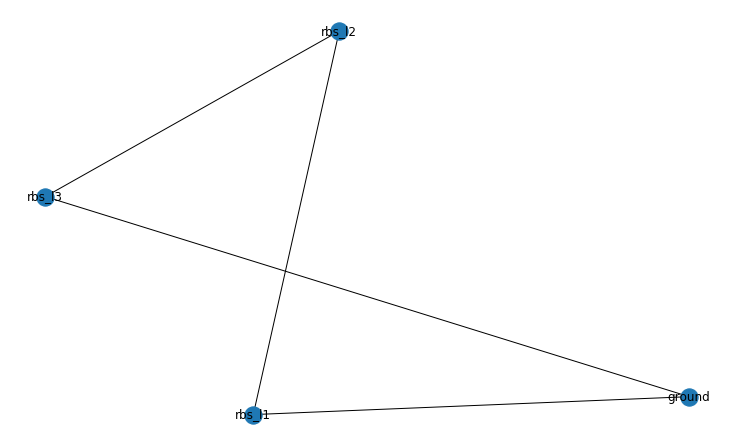

In [11]:
sym_model._mbs.draw_constraints_topology()

#### Checking the System Equations

In [12]:
sym_model._mbs.pos_equations

Matrix([
[                                                                                                         A({P_{ground}})*{\bar{u}^{ground}_{jcs_a}} - A({P_{rbs_l1}})*{\bar{u}^{rbs_l1}_{jcs_a}} + {R_{ground}} - {R_{rbs_l1}}],
[                                                                                                                                   Mbar_ground_jcs_a[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[                                                                                                                                   Mbar_ground_jcs_a[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(2, 3)]],
[(-sin(AF_jcs_a(t)))*Mbar_ground_jcs_a[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(0, 1)] + cos(AF_jcs_a(t))*Mbar_ground_jcs_a[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_l1}})*Mbar_rbs_l1_jcs_a[:,(0, 1)]],
[                                                                                      

## SYSTEM CONFIGURATION
-----------------------

In [13]:
from smbd.interfaces.scripting import configuration

In [14]:
config_name = 'spatial_fourbar_cfg'
config = configuration(config_name, sym_model)

### CONFIGURATION INPUTS

In [15]:
config.add_point.UserInput('a')
config.add_point.UserInput('b')
config.add_point.UserInput('c')
config.add_point.UserInput('d')

config.add_vector.UserInput('x')
config.add_vector.UserInput('y')
config.add_vector.UserInput('z')

### CONFIGURATION RELATIONS

In [16]:
config.add_relation.Equal_to('pt1_jcs_a', ('hps_a',))
config.add_relation.Equal_to('pt1_jcs_b', ('hps_b',))
config.add_relation.Equal_to('pt1_jcs_c', ('hps_c',))
config.add_relation.Equal_to('pt1_jcs_d', ('hps_d',))

config.add_relation.Oriented('ax1_jcs_c', ('hps_b', 'hps_c'))
config.add_relation.Oriented('ax2_jcs_c', ('hps_c', 'hps_b'))

config.add_relation.Equal_to('ax1_jcs_a', ('vcs_x',))
config.add_relation.Equal_to('ax1_jcs_b', ('vcs_y',))
config.add_relation.Equal_to('ax1_jcs_d', ('vcs_z',))


### CONFIGURATION GEOMETRIES

In [17]:
config.add_scalar.UserInput('links_ro')

config.add_geometry.Cylinder_Geometry('l1', ('hps_a','hps_b','s_links_ro'))
config.assign_geometry_to_body('rbs_l1', 'gms_l1')

config.add_geometry.Cylinder_Geometry('l2', ('hps_b','hps_c','s_links_ro'))
config.assign_geometry_to_body('rbs_l2', 'gms_l2')

config.add_geometry.Cylinder_Geometry('l3', ('hps_c','hps_d','s_links_ro'))
config.assign_geometry_to_body('rbs_l3', 'gms_l3')

### ASSEMBLING AND SAVING CONFIGURATION

In [18]:
config.assemble_model()

In [19]:
config.extract_inputs_to_csv()

## CODE GENERATION

In [20]:
from smbd.numenv.python.codegen import generators

In [21]:
model_code = generators.template_codegen(sym_model._mbs)
model_code.write_code_file()

File full path : spatial_fourbar.py


In [22]:
config_code = generators.configuration_codegen(config._config)
config_code.write_code_file()

File full path : spatial_fourbar_cfg.py


## NUMERICAL SIMULATION

In [23]:
import numpy as np

In [24]:
from smbd.numenv.python.interfaces.scripting import multibody_system, simulation

In [25]:
import spatial_fourbar, spatial_fourbar_cfg

In [26]:
num_model = multibody_system(spatial_fourbar)
num_model.system.config = spatial_fourbar_cfg.configuration()

In [27]:
inputs_df = config._config.create_inputs_dataframe()

In [28]:
inputs_df.loc['P_ground'] = 1, 0, 0, 0

inputs_df.loc['hps_a'] =  0, 0, 0, 0
inputs_df.loc['hps_b'] =  0, 0, 200, 0
inputs_df.loc['hps_c'] = -750, -850, 650,0
inputs_df.loc['hps_d'] = -400, -850, 0  ,0

inputs_df.loc['vcs_x'] = 1,0,0,0
inputs_df.loc['vcs_y'] = 0,1,0,0
inputs_df.loc['vcs_z'] = 0,0,1,0

inputs_df.loc['s_links_ro'] = 20,0,0,0

In [29]:
num_model.system.config.load_from_dataframe(inputs_df)

In [30]:
num_model.system.config.AF_jcs_a = lambda t : np.deg2rad(360)*t

In [31]:
sim1 = simulation('sim1', num_model, 'kds')
sim1.set_time_array(1, 100)
sim1.solve()


Running System Kinematic Analysis:
Progress: [=========================] 100%, (99/99) steps.

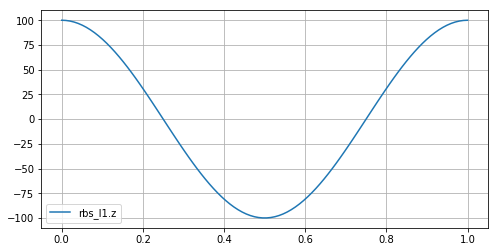

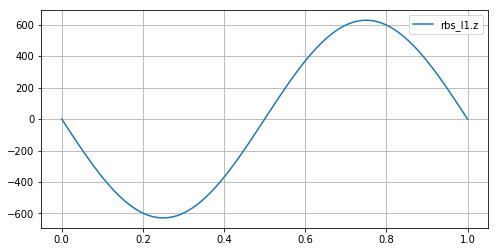

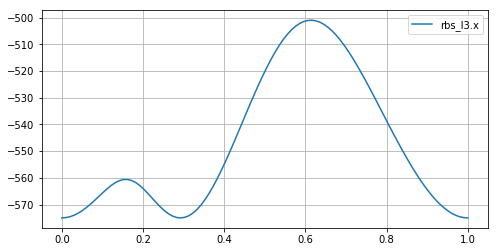

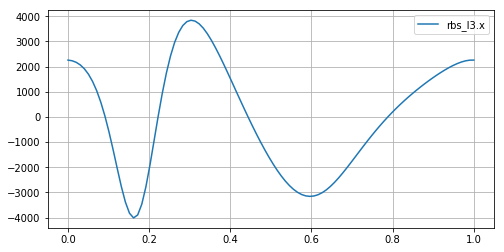

In [32]:
sim1.plot([('rbs_l1.z', 'pos')])
sim1.plot([('rbs_l1.z', 'vel')])
sim1.plot([('rbs_l3.x', 'pos')])
sim1.plot([('rbs_l3.x', 'acc')])